# Visualization

In [1]:
#Import all the necessary packages
import numpy as np
import pandas as pd
from pandas import DataFrame

#for visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

#ML
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

#To ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls',index=False)
data.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3


In [6]:
#Removal of Employee number which is not required.
data = data.drop(['EmpNumber'],axis=1)
data.head(2)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3


# Department wise performances

In [7]:
#To check the count of people in each department
data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [8]:
#To check the performance of the employees department wise
data.groupby(['EmpDepartment'])['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

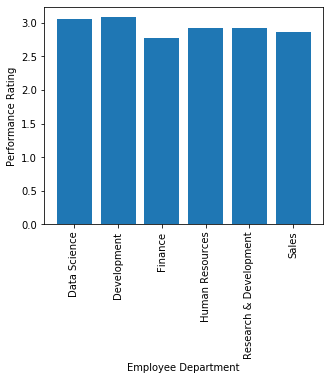

In [9]:
#Visualization for performance of the employees department wise
rcParams['figure.figsize'] = 5,4

keys = [EmpDepartment for EmpDepartment, df in data.groupby(['EmpDepartment'])]

plt.bar(keys,data.groupby(['EmpDepartment']).mean()['PerformanceRating'])
plt.ylabel('Performance Rating')
plt.xlabel('Employee Department')
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

In [10]:
#Count of employees with respect to each department with performance rating
data.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

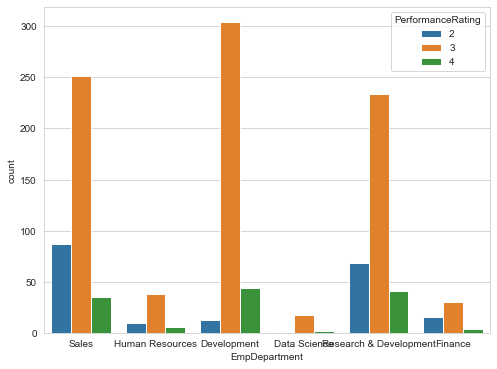

In [11]:
#Count of total ratings with respective to the department
rcParams ['figure.figsize'] = 8,6
sns.set_style('whitegrid')
sns.countplot(x = 'EmpDepartment', hue= 'PerformanceRating', data = data)

# Data Science

In [69]:
data_ds= data[(data.EmpDepartment == 'Data Science')]
data_ds.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,3,...,2,7,2,3,4,2,0,2,No,3
107,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,4,...,1,1,3,2,1,0,0,0,Yes,3
108,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,3,...,1,17,2,2,16,8,4,11,No,3
120,48,Male,Medical,Married,Data Science,Data Scientist,Travel_Rarely,20,4,4,...,1,13,2,2,0,0,0,0,No,3
942,51,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,8,4,2,...,4,16,5,1,10,9,4,7,No,3


In [14]:
data_ds_gender = data_ds.groupby(['Gender']).mean()
data_ds_gender.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Gender,,,,,,,,,,,,,,,,,,,
Female,38.125000,7.750000,2.75,3.375000,65.000000,2.875000,2.000000,2.750000,2.375000,16.125000,2.375000,12.25,3.25,2.375000,4.750000,3.125000,1.25,3.375000,3.000000
Male,37.916667,10.916667,2.75,2.666667,60.416667,2.916667,2.166667,2.666667,1.916667,16.666667,2.583333,12.00,2.75,2.583333,6.583333,2.916667,1.75,4.083333,3.083333


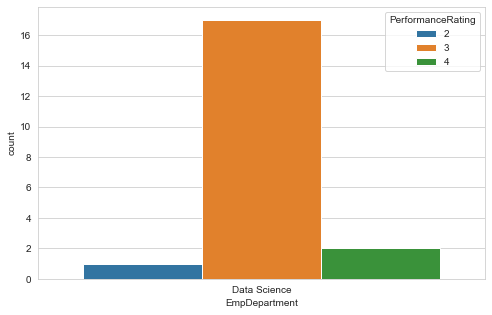

In [68]:
#Performance rating of Data science department
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'EmpDepartment', hue= 'PerformanceRating', data = data_ds)

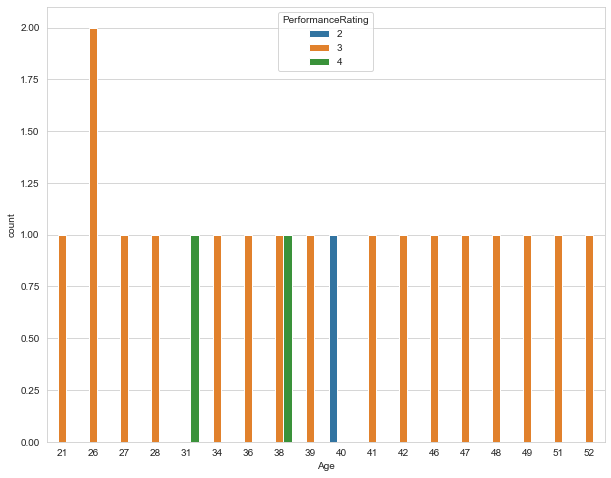

In [70]:
#Age wise performance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x = 'Age', hue= 'PerformanceRating', data = data_ds)

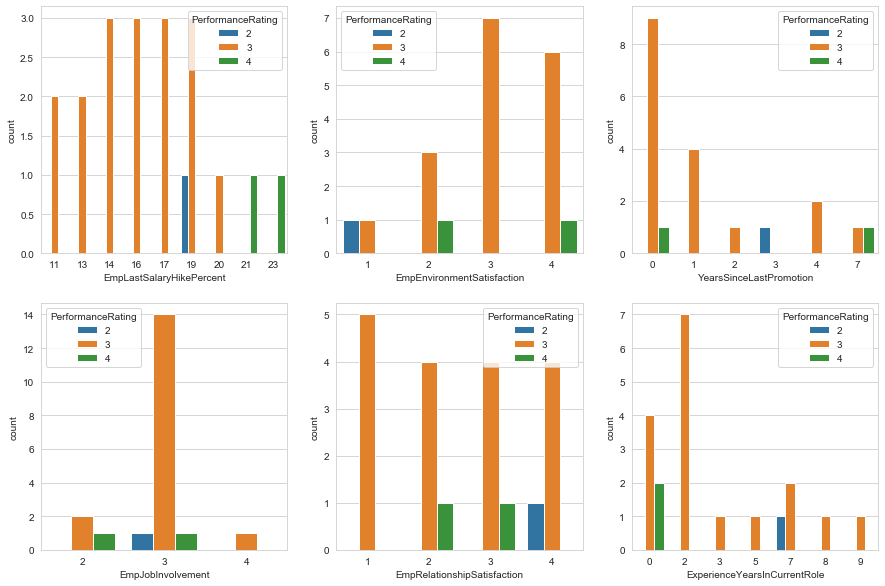

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x = 'EmpLastSalaryHikePercent', hue= 'PerformanceRating', data = data_ds)
plt.subplot(2,3,2)
sns.countplot(x = 'EmpEnvironmentSatisfaction', hue= 'PerformanceRating', data = data_ds)
plt.subplot(2,3,3)
sns.countplot(x = 'YearsSinceLastPromotion', hue= 'PerformanceRating', data = data_ds)
plt.subplot(2,3,4)
sns.countplot(x = 'EmpJobInvolvement', hue= 'PerformanceRating', data = data_ds)
plt.subplot(2,3,5)
sns.countplot(x = 'EmpRelationshipSatisfaction', hue= 'PerformanceRating', data = data_ds)
plt.subplot(2,3,6)
sns.countplot(x = 'ExperienceYearsInCurrentRole', hue= 'PerformanceRating', data = data_ds)

# Development

In [29]:
data_dev= data[(data.EmpDepartment == 'Development')]
data_dev.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,4,...,3,9,4,2,9,7,1,7,No,4
7,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,1,...,4,10,4,3,7,7,3,7,Yes,3
8,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,1,...,1,10,2,3,8,7,0,5,No,3
9,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,3,...,4,10,4,4,1,0,0,0,No,3
10,44,Male,Medical,Single,Development,Developer,Non-Travel,24,3,1,...,3,9,5,3,5,2,1,4,No,3


In [40]:
data_dev_gender = data_dev.groupby(['Gender']).mean()
data_dev_gender.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Gender,,,,,,,,,,,,,,,,,,,
Female,37.239437,8.577465,2.985915,2.647887,64.697183,2.852113,1.971831,2.626761,2.957746,14.915493,2.774648,11.485915,2.802817,2.704225,6.852113,4.091549,2.098592,4.056338,3.098592
Male,36.273973,8.926941,2.767123,2.748858,66.561644,2.748858,1.917808,2.826484,2.726027,15.392694,2.872146,10.698630,2.726027,2.675799,6.643836,4.000000,2.004566,3.894977,3.077626


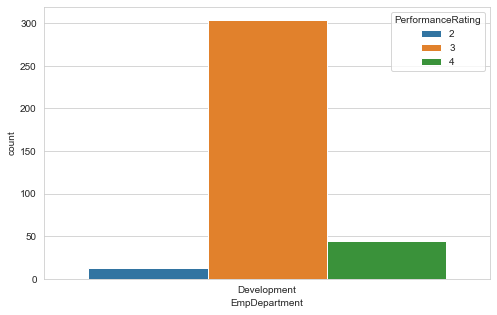

In [30]:
#Performance rating of Data science department
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'EmpDepartment', hue= 'PerformanceRating', data = data_dev)

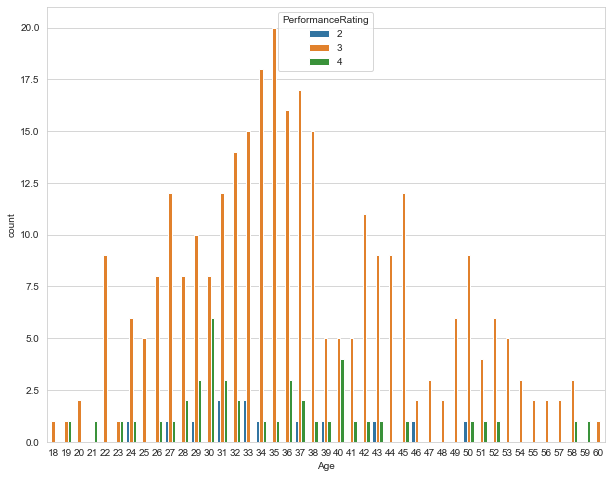

In [31]:
#Age wise performance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x = 'Age', hue= 'PerformanceRating', data = data_dev)

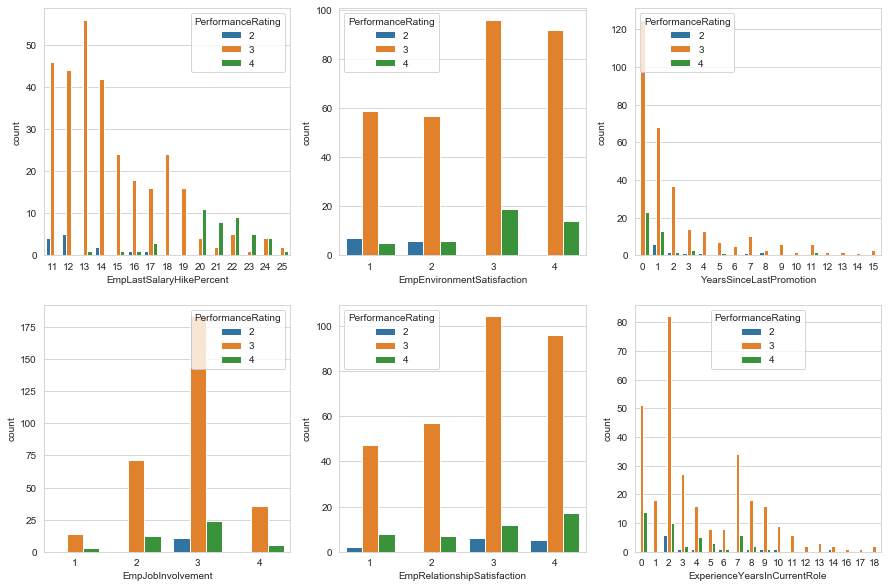

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x = 'EmpLastSalaryHikePercent', hue= 'PerformanceRating', data = data_dev)
plt.subplot(2,3,2)
sns.countplot(x = 'EmpEnvironmentSatisfaction', hue= 'PerformanceRating', data = data_dev)
plt.subplot(2,3,3)
sns.countplot(x = 'YearsSinceLastPromotion', hue= 'PerformanceRating', data = data_dev)
plt.subplot(2,3,4)
sns.countplot(x = 'EmpJobInvolvement', hue= 'PerformanceRating', data = data_dev)
plt.subplot(2,3,5)
sns.countplot(x = 'EmpRelationshipSatisfaction', hue= 'PerformanceRating', data = data_dev)
plt.subplot(2,3,6)
sns.countplot(x = 'ExperienceYearsInCurrentRole', hue= 'PerformanceRating', data = data_dev)

# Finance

In [75]:
data_finance= data[(data.EmpDepartment == 'Finance')]
data_finance.head(10)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,1,...,4,6,0,4,6,4,1,3,No,2
484,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,4,...,4,4,2,3,2,2,2,2,No,3
485,35,Male,Life Sciences,Married,Finance,Finance Manager,Travel_Rarely,28,3,2,...,4,10,3,2,10,9,6,8,No,2
486,34,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Frequently,10,4,4,...,2,8,3,2,8,2,7,7,No,3
487,43,Male,Technical Degree,Divorced,Finance,Finance Manager,Travel_Rarely,27,3,4,...,3,8,0,3,6,4,0,2,No,3
488,28,Male,Medical,Married,Finance,Finance Manager,Travel_Rarely,24,3,3,...,3,1,3,3,1,1,0,0,Yes,3
489,22,Female,Other,Married,Finance,Finance Manager,Non-Travel,26,2,2,...,2,4,2,2,4,2,1,3,No,2
490,50,Male,Medical,Married,Finance,Finance Manager,Travel_Frequently,20,5,2,...,3,32,3,3,30,8,12,13,No,2
491,32,Female,Other,Married,Finance,Finance Manager,Travel_Rarely,5,4,2,...,4,6,3,3,3,2,0,2,No,3
492,44,Female,Medical,Divorced,Finance,Finance Manager,Travel_Rarely,7,3,2,...,4,23,4,2,22,7,1,10,No,2


In [39]:
data_finance_gender = data_finance.groupby(['Gender']).mean()
data_finance_gender.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Gender,,,,,,,,,,,,,,,,,,,
Female,38.863636,11.272727,3.227273,2.681818,62.454545,2.681818,2.181818,2.590909,2.681818,15.590909,2.818182,13.136364,3.181818,2.545455,7.454545,4.590909,1.772727,4.681818,2.681818
Male,34.370370,12.370370,2.925926,2.962963,70.148148,3.037037,1.740741,2.703704,2.000000,15.185185,2.592593,9.037037,2.555556,2.777778,7.000000,4.777778,2.111111,4.222222,2.851852


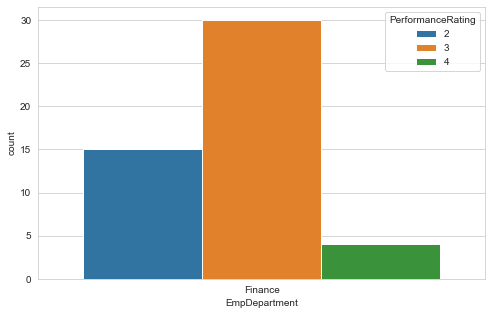

In [41]:
#Performance rating of Data science department
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'EmpDepartment', hue= 'PerformanceRating', data = data_finance)

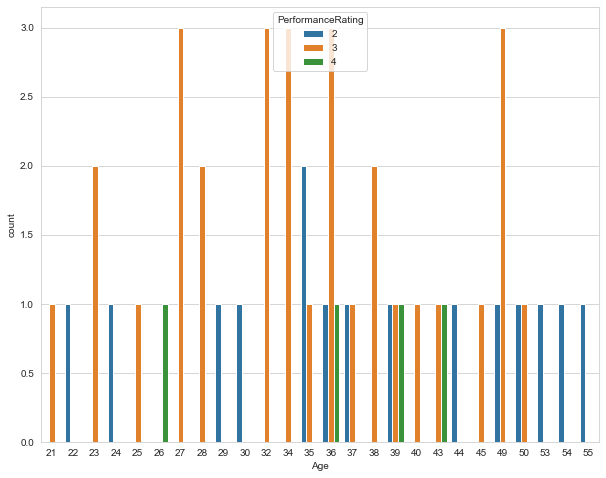

In [42]:
#Age wise performance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x = 'Age', hue= 'PerformanceRating', data = data_finance)

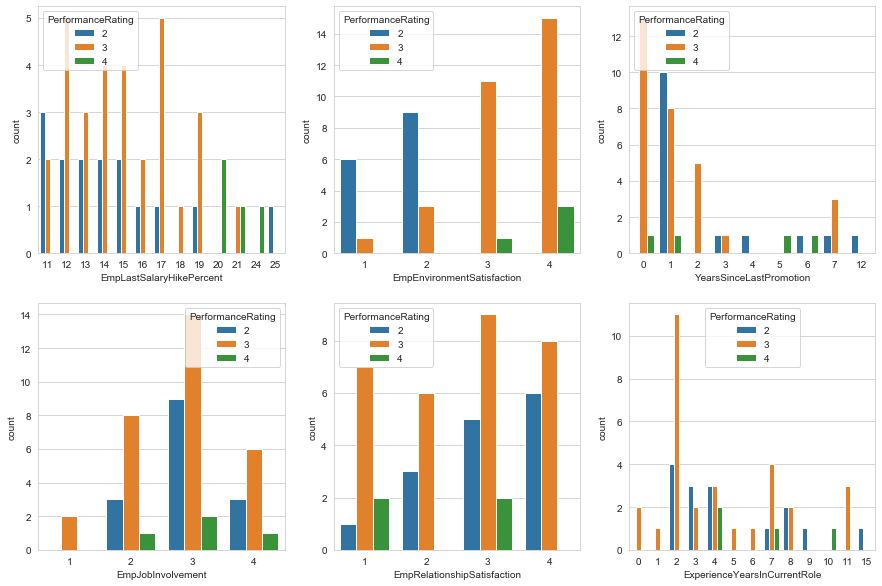

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x = 'EmpLastSalaryHikePercent', hue= 'PerformanceRating', data = data_finance)
plt.subplot(2,3,2)
sns.countplot(x = 'EmpEnvironmentSatisfaction', hue= 'PerformanceRating', data = data_finance)
plt.subplot(2,3,3)
sns.countplot(x = 'YearsSinceLastPromotion', hue= 'PerformanceRating', data = data_finance)
plt.subplot(2,3,4)
sns.countplot(x = 'EmpJobInvolvement', hue= 'PerformanceRating', data = data_finance)
plt.subplot(2,3,5)
sns.countplot(x = 'EmpRelationshipSatisfaction', hue= 'PerformanceRating', data = data_finance)
plt.subplot(2,3,6)
sns.countplot(x = 'ExperienceYearsInCurrentRole', hue= 'PerformanceRating', data = data_finance)

# Human Resources 

In [71]:
data_hr= data[(data.EmpDepartment == 'Human Resources')]
data_hr.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
16,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,3,...,3,12,3,1,8,3,3,6,No,3
58,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,3,...,2,8,2,3,5,2,0,4,No,3
81,28,Male,Medical,Divorced,Human Resources,Human Resources,Travel_Rarely,8,2,2,...,4,6,6,3,5,1,0,4,No,3
85,36,Male,Life Sciences,Married,Human Resources,Human Resources,Travel_Rarely,8,3,1,...,3,6,3,3,5,4,0,3,No,3


In [45]:
data_hr_gender = data_hr.groupby(['Gender']).mean()
data_hr_gender.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Gender,,,,,,,,,,,,,,,,,,,
Female,37.764706,11.588235,3.0,2.882353,54.588235,2.823529,2.117647,2.705882,4.235294,14.647059,2.882353,10.823529,2.235294,3.000000,5.352941,2.588235,1.470588,3.588235,3.058824
Male,38.729730,7.324324,3.0,2.513514,70.810811,2.756757,2.027027,2.486486,2.621622,14.783784,2.891892,12.324324,2.729730,2.891892,8.378378,4.027027,1.972973,4.027027,2.864865


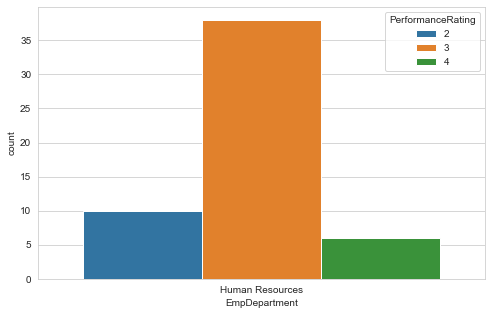

In [46]:
#Performance rating of Data science department
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'EmpDepartment', hue= 'PerformanceRating', data = data_hr)

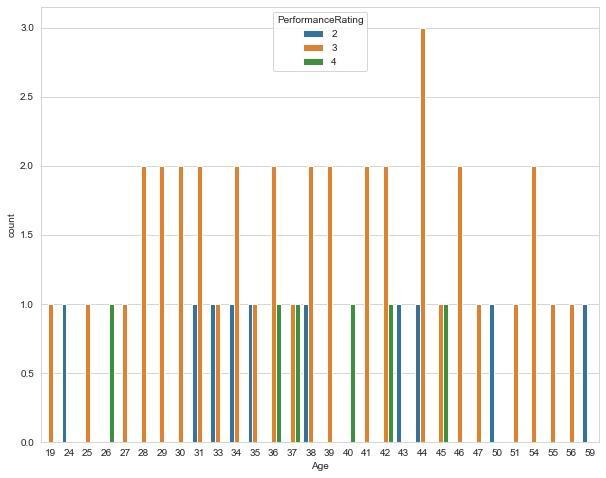

In [47]:
#Age wise performance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x = 'Age', hue= 'PerformanceRating', data = data_hr)

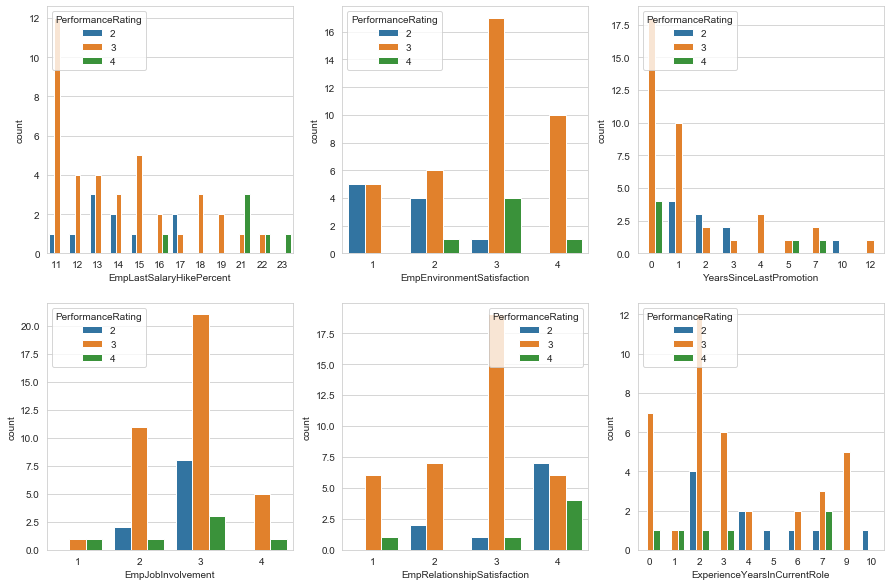

In [48]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x = 'EmpLastSalaryHikePercent', hue= 'PerformanceRating', data = data_hr)
plt.subplot(2,3,2)
sns.countplot(x = 'EmpEnvironmentSatisfaction', hue= 'PerformanceRating', data = data_hr)
plt.subplot(2,3,3)
sns.countplot(x = 'YearsSinceLastPromotion', hue= 'PerformanceRating', data = data_hr)
plt.subplot(2,3,4)
sns.countplot(x = 'EmpJobInvolvement', hue= 'PerformanceRating', data = data_hr)
plt.subplot(2,3,5)
sns.countplot(x = 'EmpRelationshipSatisfaction', hue= 'PerformanceRating', data = data_hr)
plt.subplot(2,3,6)
sns.countplot(x = 'ExperienceYearsInCurrentRole', hue= 'PerformanceRating', data = data_hr)

# Research & Development

In [49]:
data_rd= data[(data.EmpDepartment == 'Research & Development')]
data_rd.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,3,...,2,3,0,2,2,1,0,2,No,3
157,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,3,...,4,5,2,1,4,2,0,2,Yes,3
158,31,Female,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Frequently,1,1,3,...,3,4,1,3,4,3,0,3,No,3
159,18,Male,Life Sciences,Single,Research & Development,Research Scientist,Non-Travel,5,2,2,...,4,0,2,3,0,0,0,0,No,3
160,54,Female,Technical Degree,Married,Research & Development,Senior Manager R&D,Travel_Rarely,17,3,3,...,3,22,2,3,10,7,0,8,No,3


In [50]:
data_rd_gender = data_rd.groupby(['Gender']).mean()
data_rd_gender.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Gender,,,,,,,,,,,,,,,,,,,
Female,38.031008,9.612403,2.852713,2.829457,67.263566,2.620155,2.162791,2.643411,2.713178,15.333333,2.581395,12.806202,2.992248,2.682171,7.868217,4.782946,2.527132,4.449612,2.945736
Male,37.140187,9.000000,2.887850,2.742991,66.878505,2.724299,1.897196,2.766355,2.682243,15.280374,2.635514,11.107477,2.658879,2.780374,6.457944,4.018692,2.074766,3.775701,2.906542


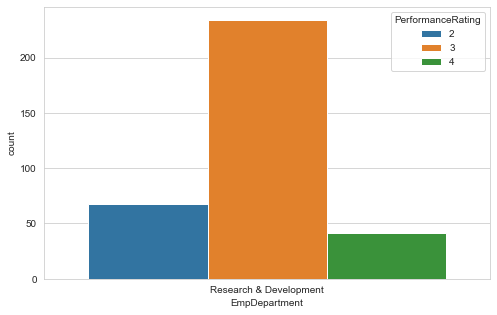

In [51]:
#Performance rating of Data science department
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'EmpDepartment', hue= 'PerformanceRating', data = data_rd)

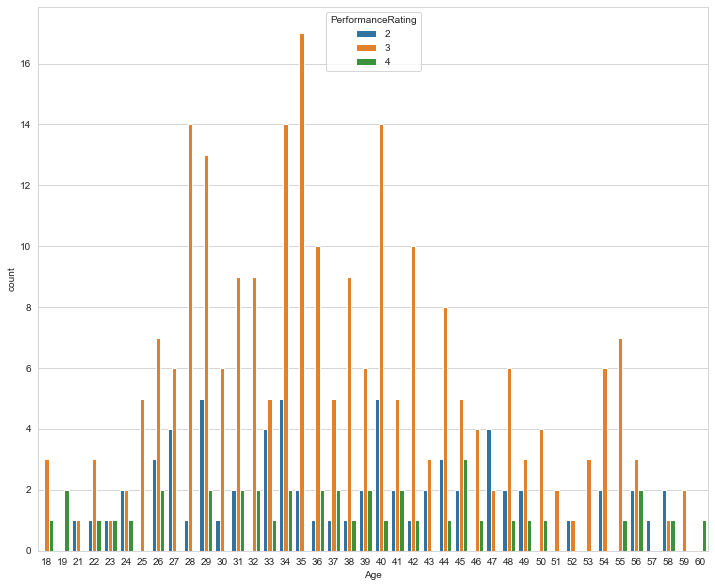

In [54]:
#Age wise performance
plt.figure(figsize=(12,10))
sns.set_style('whitegrid')
sns.countplot(x = 'Age', hue= 'PerformanceRating', data = data_rd)

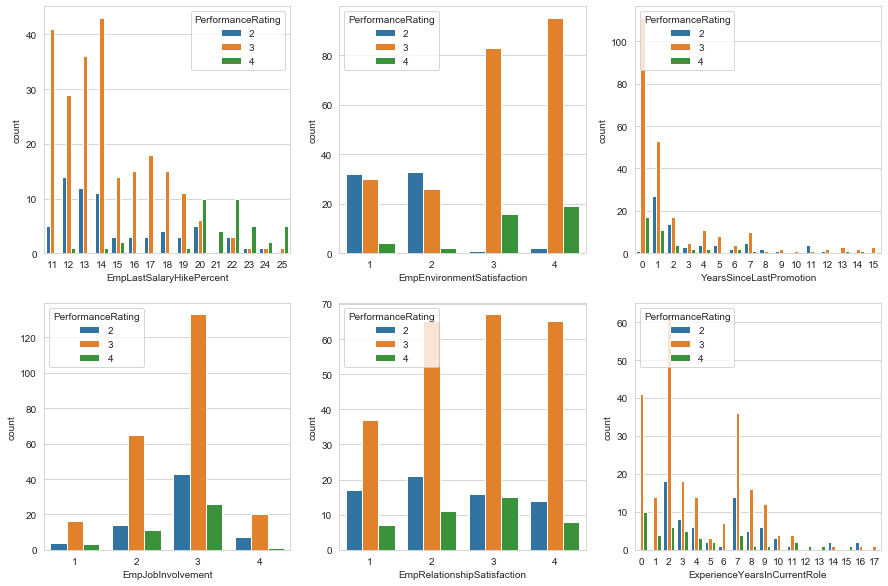

In [55]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x = 'EmpLastSalaryHikePercent', hue= 'PerformanceRating', data = data_rd)
plt.subplot(2,3,2)
sns.countplot(x = 'EmpEnvironmentSatisfaction', hue= 'PerformanceRating', data = data_rd)
plt.subplot(2,3,3)
sns.countplot(x = 'YearsSinceLastPromotion', hue= 'PerformanceRating', data = data_rd)
plt.subplot(2,3,4)
sns.countplot(x = 'EmpJobInvolvement', hue= 'PerformanceRating', data = data_rd)
plt.subplot(2,3,5)
sns.countplot(x = 'EmpRelationshipSatisfaction', hue= 'PerformanceRating', data = data_rd)
plt.subplot(2,3,6)
sns.countplot(x = 'ExperienceYearsInCurrentRole', hue= 'PerformanceRating', data = data_rd)

# Sales

In [58]:
data_sales= data[(data.EmpDepartment == 'Sales')]
data_sales.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3
6,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,4,...,4,4,2,3,2,2,2,2,No,3


In [59]:
data_sales_gender = data_sales.groupby(['Gender']).mean()
data_sales_gender.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Gender,,,,,,,,,,,,,,,,,,,
Female,36.649682,8.891720,2.878981,2.636943,67.700637,2.675159,2.267516,2.821656,2.541401,15.445860,2.66242,11.509554,2.853503,2.808917,7.592357,4.700637,2.452229,4.363057,2.840764
Male,36.314815,9.356481,2.944444,2.662037,63.587963,2.689815,2.277778,2.726852,2.472222,14.939815,2.75000,10.976852,2.814815,2.787037,7.430556,4.606481,2.388889,4.291667,2.875000


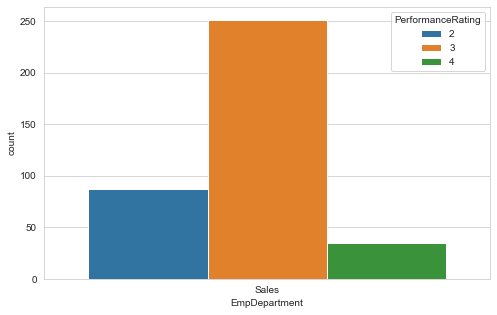

In [60]:
#Performance rating of Data science department
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'EmpDepartment', hue= 'PerformanceRating', data = data_sales)

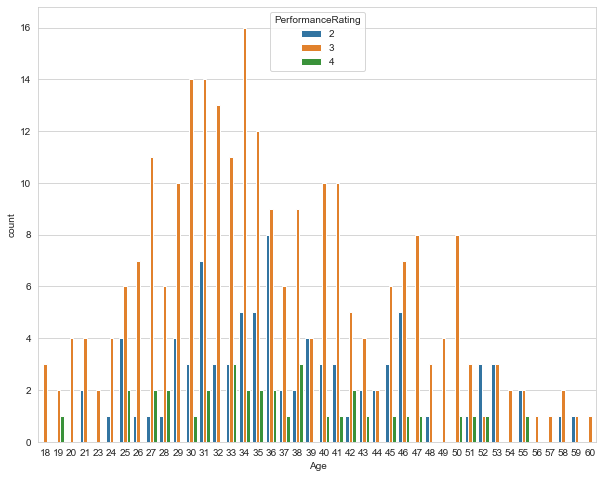

In [61]:
#Age wise performance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x = 'Age', hue= 'PerformanceRating', data = data_sales)

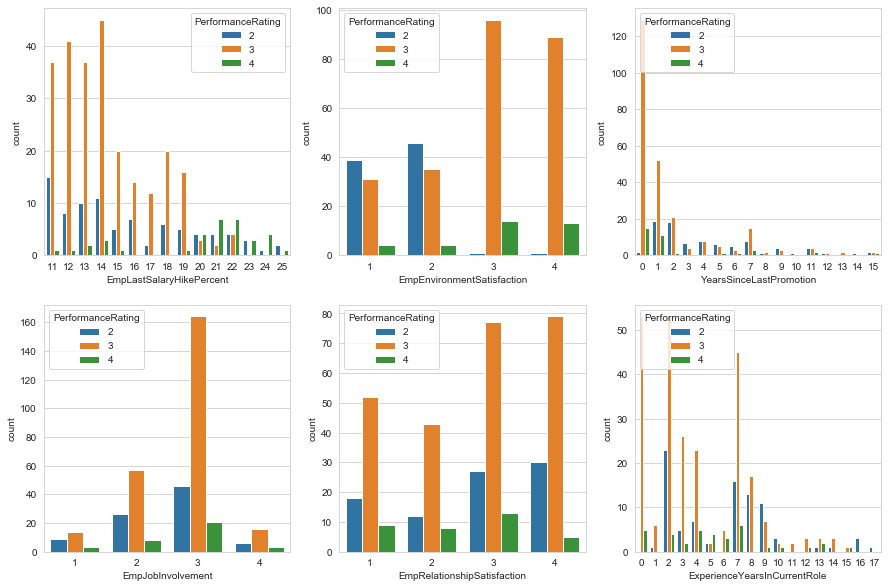

In [62]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x = 'EmpLastSalaryHikePercent', hue= 'PerformanceRating', data = data_sales)
plt.subplot(2,3,2)
sns.countplot(x = 'EmpEnvironmentSatisfaction', hue= 'PerformanceRating', data = data_sales)
plt.subplot(2,3,3)
sns.countplot(x = 'YearsSinceLastPromotion', hue= 'PerformanceRating', data = data_sales)
plt.subplot(2,3,4)
sns.countplot(x = 'EmpJobInvolvement', hue= 'PerformanceRating', data = data_sales)
plt.subplot(2,3,5)
sns.countplot(x = 'EmpRelationshipSatisfaction', hue= 'PerformanceRating', data = data_sales)
plt.subplot(2,3,6)
sns.countplot(x = 'ExperienceYearsInCurrentRole', hue= 'PerformanceRating', data = data_sales)

# To visualize the performance of employees with 2 rating

In [79]:
data_rating= data[(data.PerformanceRating == 2)]
data_rating.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
132,37,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,1,4,1,...,3,17,2,1,14,1,11,7,Yes,2
162,30,Female,Life Sciences,Married,Research & Development,Research Director,Travel_Rarely,8,2,2,...,3,9,4,2,8,7,1,7,No,2
164,22,Male,Life Sciences,Married,Research & Development,Laboratory Technician,Travel_Rarely,8,1,2,...,1,4,3,2,4,3,1,1,No,2
165,48,Male,Life Sciences,Single,Research & Development,Healthcare Representative,Travel_Rarely,6,3,1,...,4,19,0,3,2,2,2,2,No,2
169,27,Female,Life Sciences,Married,Research & Development,Senior Manager R&D,Travel_Rarely,2,4,1,...,2,4,2,3,3,2,2,2,No,2


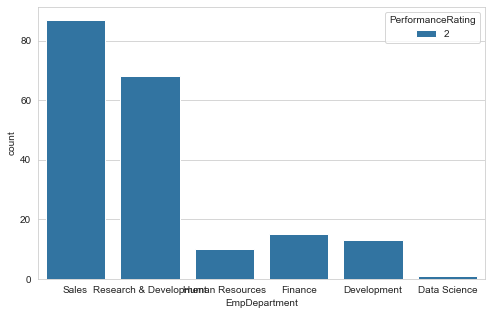

In [80]:
#Performance rating of Data science department
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'EmpDepartment', hue= 'PerformanceRating', data = data_rating)


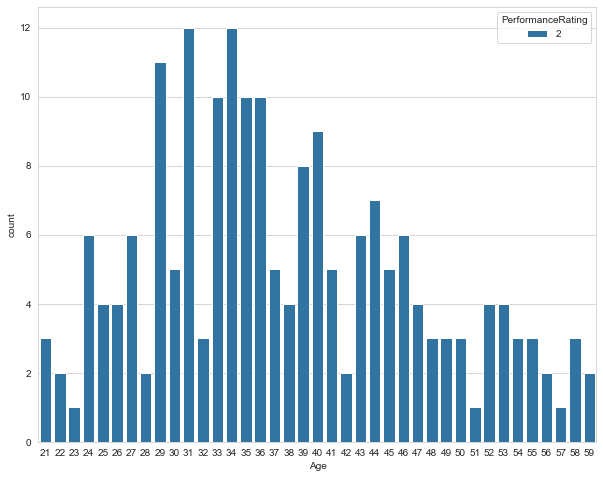

In [81]:
#Age wise performance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x = 'Age', hue= 'PerformanceRating', data = data_rating)

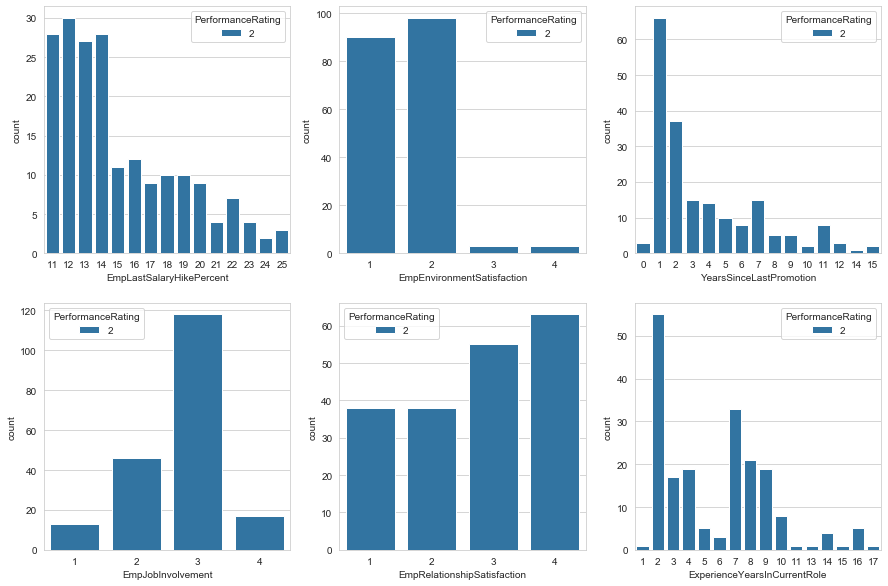

In [82]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x = 'EmpLastSalaryHikePercent', hue= 'PerformanceRating', data = data_rating)
plt.subplot(2,3,2)
sns.countplot(x = 'EmpEnvironmentSatisfaction', hue= 'PerformanceRating', data = data_rating)
plt.subplot(2,3,3)
sns.countplot(x = 'YearsSinceLastPromotion', hue= 'PerformanceRating', data = data_rating)
plt.subplot(2,3,4)
sns.countplot(x = 'EmpJobInvolvement', hue= 'PerformanceRating', data = data_rating)
plt.subplot(2,3,5)
sns.countplot(x = 'EmpRelationshipSatisfaction', hue= 'PerformanceRating', data = data_rating)
plt.subplot(2,3,6)
sns.countplot(x = 'ExperienceYearsInCurrentRole', hue= 'PerformanceRating', data = data_rating)

# Top 3 Important Factors effecting employee performance

Method1 - Correlation

In [20]:
data.corr().PerformanceRating.sort_values(ascending=False)

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EmpJobSatisfaction              0.000606
TrainingTimesLastYear          -0.005443
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
ExperienceYearsAtThisCompany   -0.111645
YearsWithCurrManager           -0.122313
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
Name: PerformanceRating, dtype: float64

Insights:
 - From correlation it is foound that the most 3 factors affecting the employee performance are,
1. EmpEnvironmentSatisfaction
2. EmpLastSalaryHikePercent
3. YearsSinceLastPromotion

Method2 - Feature importance

In [21]:
#Defining X and Y
X= data.iloc[:,1:-1]
y = data.PerformanceRating

In [22]:
#Features has both numerical as well as categorical values, we use Label Encoding to better handle our datatypes. 
enc = LabelEncoder()
X.Gender = enc.fit_transform(X.Gender)
X.EducationBackground = enc.fit_transform(X.EducationBackground)
X.MaritalStatus = enc.fit_transform(X.MaritalStatus)
X.EmpDepartment = enc.fit_transform(X.EmpDepartment)
X.EmpJobRole = enc.fit_transform(X.EmpJobRole)
X.BusinessTravelFrequency = enc.fit_transform(X.BusinessTravelFrequency)
X.Attrition = enc.fit_transform(X.Attrition)
X.OverTime = enc.fit_transform(X.OverTime)
X.head()

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,2,2,5,13,2,10,3,4,55,...,12,4,10,2,2,10,7,0,8,0
1,1,2,2,5,13,2,14,4,4,42,...,12,4,20,2,3,7,7,1,7,0
2,1,1,1,5,13,1,5,4,4,48,...,21,3,20,2,3,18,13,1,12,0
3,1,0,0,3,8,2,10,4,2,73,...,15,2,23,2,2,21,6,12,6,0
4,1,2,2,5,13,2,16,4,1,84,...,14,4,10,1,3,2,2,2,2,0


In [23]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = .3,random_state=5)

#Random Forest Classifer
model = RandomForestClassifier(n_estimators=40,random_state=30)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print('Accuracy Score:',accuracy_score( y_test,y_predict))
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Accuracy Score: 0.9222222222222223
Counter({3: 267, 2: 59, 4: 34})


col_0,2,3,4
PerformanceRating,,,
2,50,9,0
3,6,258,3
4,1,9,24


In [24]:
imp_feature = pd.DataFrame(model.feature_importances_ *100.0, index=X.columns).sort_values(0,ascending=False)
imp_feature.head(10)

,0
EmpLastSalaryHikePercent,20.945945
EmpEnvironmentSatisfaction,19.677856
YearsSinceLastPromotion,9.365032
EmpJobRole,4.736283
EmpDepartment,4.094707
EmpHourlyRate,4.016698
ExperienceYearsInCurrentRole,3.895878
DistanceFromHome,3.495304
TotalWorkExperienceInYears,3.250546
EmpWorkLifeBalance,3.088298


Insights:
 - By feature importance approach it says that the most 3 factors affecting the employee performance are,
1. EmpLastSalaryHikePercent
2. EmpEnvironmentSatisfaction
3. YearsSinceLastPromotion
